# 흥미로운 분류 문제 선정

  ### 1) 분석에 사용할 데이터 정보
  - 가입자일련번호
  - Diagnosis: 타겟 변수 (2개의 class)
  HDL콜레스테롤과 LDL 콜레스테롤 모두 정상치 범위에 해당하면 N(Normal), 이외의 경우는 A(Abnormal) *- 별도의 데이터 전처리 과정을 거쳐 파생변수로 생성함*
  
  - 환자 건강상태와 관련된 11개 변수 (csv 파일(health_data_SH) 칼럼명 C~M 참고)

    * 참고 1) 성별코드 수치화: M = 0, F = 1

    * 참고 2) 흡연상태 수치화: YES = 1, NO = 0, NOT NOW = -1

    * 참고 3) 음주여부 수치화: YES = 1, NO = 0

In [1]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import mglearn
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
['/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf', '/usr/share/fonts/truetyp

In [5]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

mpl.rcParams['axes.unicode_minus'] = False 

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

plt.rc('font', family=font_name)

NanumGothic Eco


In [6]:
# 데이터 탐색

health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/health_data_SH.csv", index_col='가입자일련번호')

print(health.columns)
display(health.info())
display(health.head()) 

Index(['Diagnosis', '총콜레스테롤', '트리글리세라이드', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피',
       '흡연상태(수치화)', '음주여부(수치화)', '구강검진수검여부', '치아우식증유무', '치석', '성별코드(수치화)',
       '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)',
       '청력(좌)', '청력(우)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 7 to 9975
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Diagnosis    1249 non-null   object 
 1   총콜레스테롤       1249 non-null   int64  
 2   트리글리세라이드     1249 non-null   int64  
 3   수축기혈압        1249 non-null   int64  
 4   이완기혈압        1249 non-null   int64  
 5   식전혈당(공복혈당)   1249 non-null   int64  
 6   혈색소          1249 non-null   float64
 7   요단백          1249 non-null   int64  
 8   혈청크레아티닌      1249 non-null   float64
 9   (혈청지오티)AST   1249 non-null   int64  
 10  (혈청지오티)ALT   1249 non-null   int64  
 11  감

None

,Diagnosis,총콜레스테롤,트리글리세라이드,수축기혈압,이완기혈압,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,...,치석,성별코드(수치화),연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우)
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
7,A,119,265,112,73,250,15.7,1,0.7,18,...,1,0,9,165,80,93.0,0.8,0.7,1,2
17,N,223,328,138,88,94,16.6,1,1.0,29,...,1,0,11,160,65,90.0,0.6,0.6,1,1
22,A,254,85,114,73,94,11.8,1,0.8,24,...,0,1,11,155,50,65.9,0.7,1.0,1,1
28,N,195,75,139,85,104,14.3,1,1.4,33,...,0,0,17,155,60,82.0,0.5,0.7,1,1
48,N,199,106,110,72,114,16.3,1,1.0,28,...,0,0,16,165,65,94.0,1.5,0.6,2,2


In [7]:
# 데이터 탐색

health.describe()

,총콜레스테롤,트리글리세라이드,수축기혈압,이완기혈압,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,...,치석,성별코드(수치화),연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우)
count,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.00000,1249.000000,...,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000
mean,201.453163,126.080064,122.726181,75.997598,103.409928,14.250040,1.110488,0.881105,26.86309,26.672538,...,0.591673,0.457966,11.639712,161.737390,63.799039,82.505685,0.925620,0.904884,1.067254,1.062450
std,41.282151,69.312859,14.461663,9.689779,23.285163,1.537961,0.503794,0.356008,13.92527,23.392743,...,0.588180,0.498430,2.173535,8.995185,12.719186,9.844860,0.652522,0.476381,0.253739,0.245356
min,70.000000,20.000000,80.000000,50.000000,61.000000,6.500000,1.000000,0.400000,8.00000,2.000000,...,0.000000,0.000000,9.000000,130.000000,30.000000,57.000000,0.100000,0.100000,1.000000,1.000000
25%,172.000000,76.000000,112.000000,70.000000,91.000000,13.300000,1.000000,0.700000,20.00000,16.000000,...,0.000000,0.000000,10.000000,155.000000,55.000000,75.500000,0.700000,0.700000,1.000000,1.000000
50%,200.000000,110.000000,122.000000,76.000000,98.000000,14.300000,1.000000,0.900000,24.00000,21.000000,...,1.000000,0.000000,12.000000,160.000000,65.000000,83.000000,0.900000,0.900000,1.000000,1.000000
75%,228.000000,155.000000,132.000000,82.000000,108.000000,15.400000,1.000000,1.000000,29.00000,31.000000,...,1.000000,1.000000,13.000000,170.000000,70.000000,89.000000,1.000000,1.000000,1.000000,1.000000
max,355.000000,399.000000,176.000000,130.000000,314.000000,18.100000,6.000000,8.700000,265.00000,477.000000,...,2.000000,1.000000,18.000000,190.000000,120.000000,121.200000,9.900000,9.900000,3.000000,3.000000


N    864
A    385
Name: Diagnosis, dtype: int64


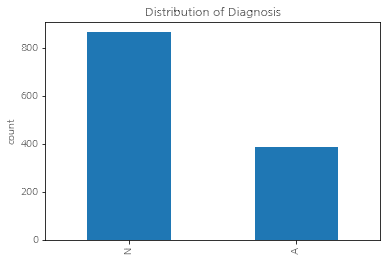

In [8]:
# 데이터 탐색

fm._rebuild()
print(health['Diagnosis'].value_counts())

health['Diagnosis'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution of Diagnosis')
plt.show()

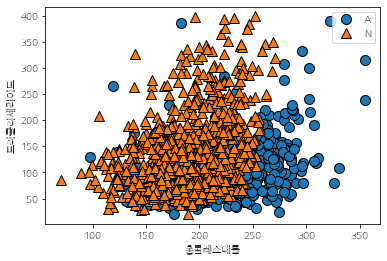

In [9]:
# 데이터 탐색

fm._rebuild()
mglearn.discrete_scatter(health['총콜레스테롤'], health['트리글리세라이드'], health['Diagnosis'])
plt.xlabel("총콜레스테롤")
plt.ylabel("트리글리세라이드")
plt.legend()
plt.show()

# 최적의 분류 모델 선택 및 평가 결과

  ### 1) 분류 모델
  - 의사결정나무 모델: 파라미터로 max_depth 활용 (깊이를 4로 제한함으로써 과적합 줄임)
  - 앙상블 모델: 랜덤포레스트 활용 (과적합 문제 완화)

  
  ### 2) 평가 방법
  - 교차 검증: 특정 데이터에만 과적합되는 모델을 만들게 되는 문제 해결
    
    *  두 분류 모델의 정확도를 비교했을 때 의사결정나무는 0.726, 랜덤포레스트는 0.794의 수치가 나왔다. 

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X = health.iloc[:, 1:11] 
y = health['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.819
시험용 데이터 정확도: 0.786


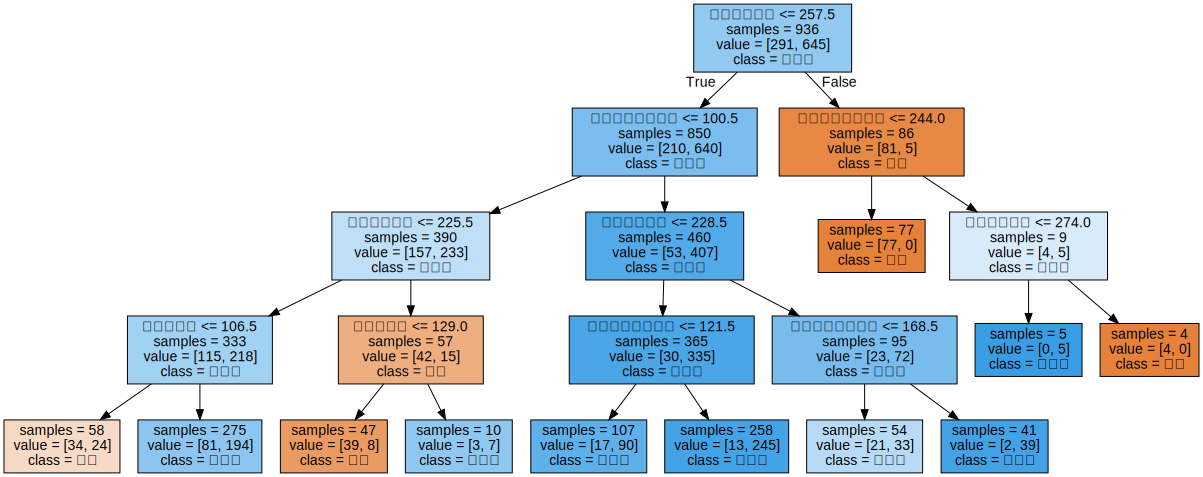

In [16]:
# 첫 번째 분류 모델

from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=[ "정상", "비정상"],
                feature_names=health.columns[1:11], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

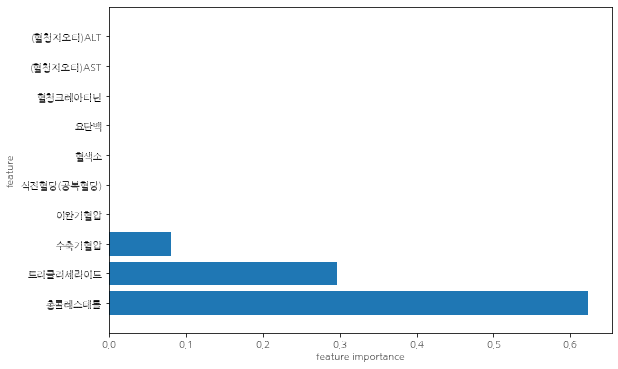

In [18]:
# 변수 중요도 파악

import numpy as np

def plot_feature_importances_health(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(health.columns[1:11]) 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), health.columns[1:11])
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances_health(tree)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


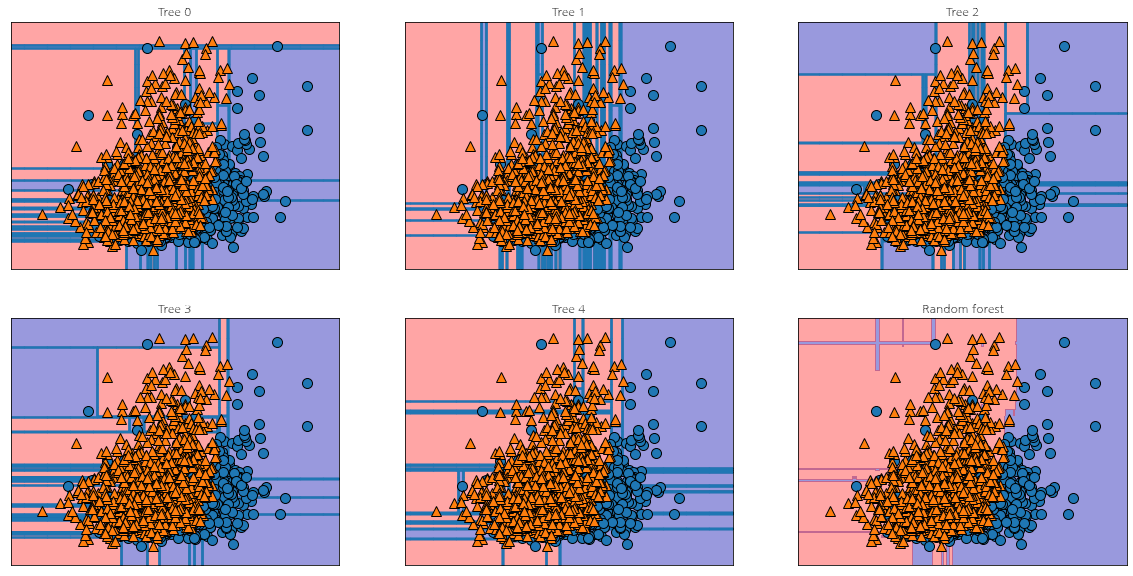

In [31]:
# 두 번째 분류 모델
# 총콜레스테롤, 트리글리세라이드 변수 이용

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train.iloc[:, 0:2], y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X.iloc[:, 0:2].values, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X.iloc[:, 0:2].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y)
plt.show()

In [32]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.821


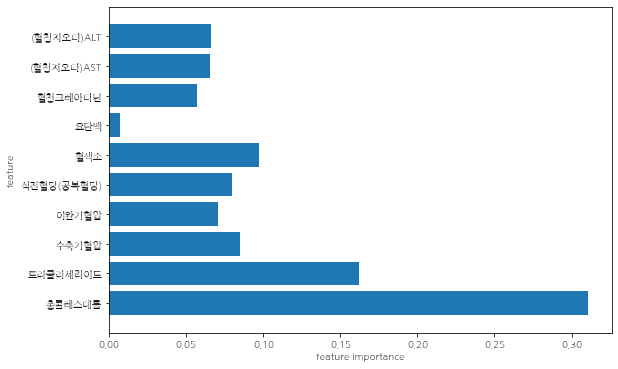

In [26]:
plot_feature_importances_health(forest)

In [34]:
# 분류 모델 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10)

print(kf)

dt_scores = cross_val_score(tree, X_train, y_train, cv=kf, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=kf, scoring='accuracy')

print("Accuracy mean -- StratifiedKFold 이용")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
Accuracy mean -- StratifiedKFold 이용
Decision tree :0.726
Random forest :0.794


# 인사이트 도출

  * 주요 변수 설명

  : 의사결정나무를 생성하는 데 비중이 큰 변수는 총콜레스테롤과 트리글리세라이드로 나타났다.

  : 랜덤 포레스트 모델 분석 결과, 위의 두 변수를 제외하면 수축기혈압, 혈색소 등이 나무를 생성하는 데 큰 비중으로 사용되는 것을 알 수 있다.   



